In [1]:
import pandas as pd
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from tqdm import tqdm
import matplotlib.animation as ani
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-dark-palette')
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
# print all the columns
#pd.set_option('display.max_columns', None)
# print all the lines
#pd.set_option('display.max_rows', None)

In [4]:
def adf_test(ts, signif=0.05):
    times = -1
    p = 1
    while (p > signif):
        #print(times)
        times = times + 1
        dftest = ADF(ts)
        p = dftest[1]
        ts = ts.diff().dropna()
    return times
        
def order(train, times):
    tmp = []
    for p in range(1, 6):
        for q in range(5):
            try:
                tmp.append([ARIMA(train, order=(p, times, q)).fit().bic, p, q])
            except:
                tmp.append([None, p, q])
    tmp = pd.DataFrame(tmp,columns = ['bic', 'p', 'q'])
    return tmp[tmp['bic'] == tmp['bic'].min()]
    
def plot_time_series(ts_1, ts_label_1, ts_2, ts_label_2, title, path):
    assert len(ts_1) == len(ts_2)
    xs = list(range(0, len(ts_1)))

    plt.rcParams['savefig.dpi'] = 300 
    plt.rcParams['figure.dpi'] = 300
    
    plt.plot(xs, ts_2, c='red', label=ts_label_2, lw = 1)
    plt.plot(xs, ts_1, c='green', label=ts_label_1, lw = 1)

    plt.title(title)
    plt.legend(loc='upper left')
    plt.savefig(path)
    plt.show()
    

def line_plot2(ts_1, ts_label_1, ts_2, ts_label_2, ts_3, ts_label_3, title, m):
    assert len(ts_1) == len(ts_2)

    xs1 = list(range(0, len(ts_3)))
    xs2 = list(range(len(ts_3), len(ts_3) + len(ts_1)))

    plt.rcParams['savefig.dpi'] = 300 
    plt.rcParams['figure.dpi'] = 300

    plt.plot(xs2, ts_1, c = 'orangered', label = ts_label_1, lw = 1.5)
    plt.plot(xs2, ts_2, c = 'lightskyblue', label = ts_label_2, lw = 1.5)
    plt.plot(xs1, ts_3, c = 'forestgreen', label = ts_label_3, lw = 1.5)

    plt.title(title)
    plt.legend(loc='upper left')
    plt.savefig('../figures/%s'%m)
    plt.show()
    
def comparaison_plot(ts_1, ts_label_1, ts_2, ts_label_2, ts_3, ts_label_3, title):
    assert len(ts_1) == len(ts_2)
    assert len(ts_2) == len(ts_3)
    
    xs = list(range(0, len(ts_1)))
    
    plt.rcParams['savefig.dpi'] = 300 
    plt.rcParams['figure.dpi'] = 300
    
    plt.plot(xs, ts_2, c='red', label=ts_label_2, lw = 1)
    plt.plot(xs, ts_3, c='blue', label=ts_label_3, lw = 1)
    plt.plot(xs, ts_1, c='green', label=ts_label_1, lw = 1)

    plt.title(title)
    plt.legend(loc='upper left')
    #plt.savefig(path)
    plt.show()
    
def ARIMA_model_loop(data, coef, times, radar): 
    
    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    par = order(data, times)
    # Forecast
    start_t = len(train)
    predictions = list()
    for t in range(len(test)):        
        current_t = t + start_t
        model = ARIMA(data[:current_t], order=(par['p'], times, par['q']))       
        model_fit = model.fit()  
        predictions.append(model_fit.forecast().iloc[0])
        
    predictions = pd.DataFrame(predictions, columns = [radar])
    
    return predictions 

def ARIMA_model(data, coef, times, radar):
    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    par = order(data, times)
    # Forecast
    model = ARIMA(train, order=(par['p'], times, par['q']))       
    model_fit = model.fit()  
    predictions = model_fit.forecast(len(test)).to_frame()
    predictions.rename(columns={'predicted_mean':radar}, inplace = True)
    
    return predictions

## ARIMA with loop

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/User

            KABR
0     984.990046
1     977.156377
2     982.824055
3     967.199524
4     971.667586
..           ...
455   902.252826
456  1025.086003
457   861.914449
458   863.529861
459   853.469045

[460 rows x 1 columns]


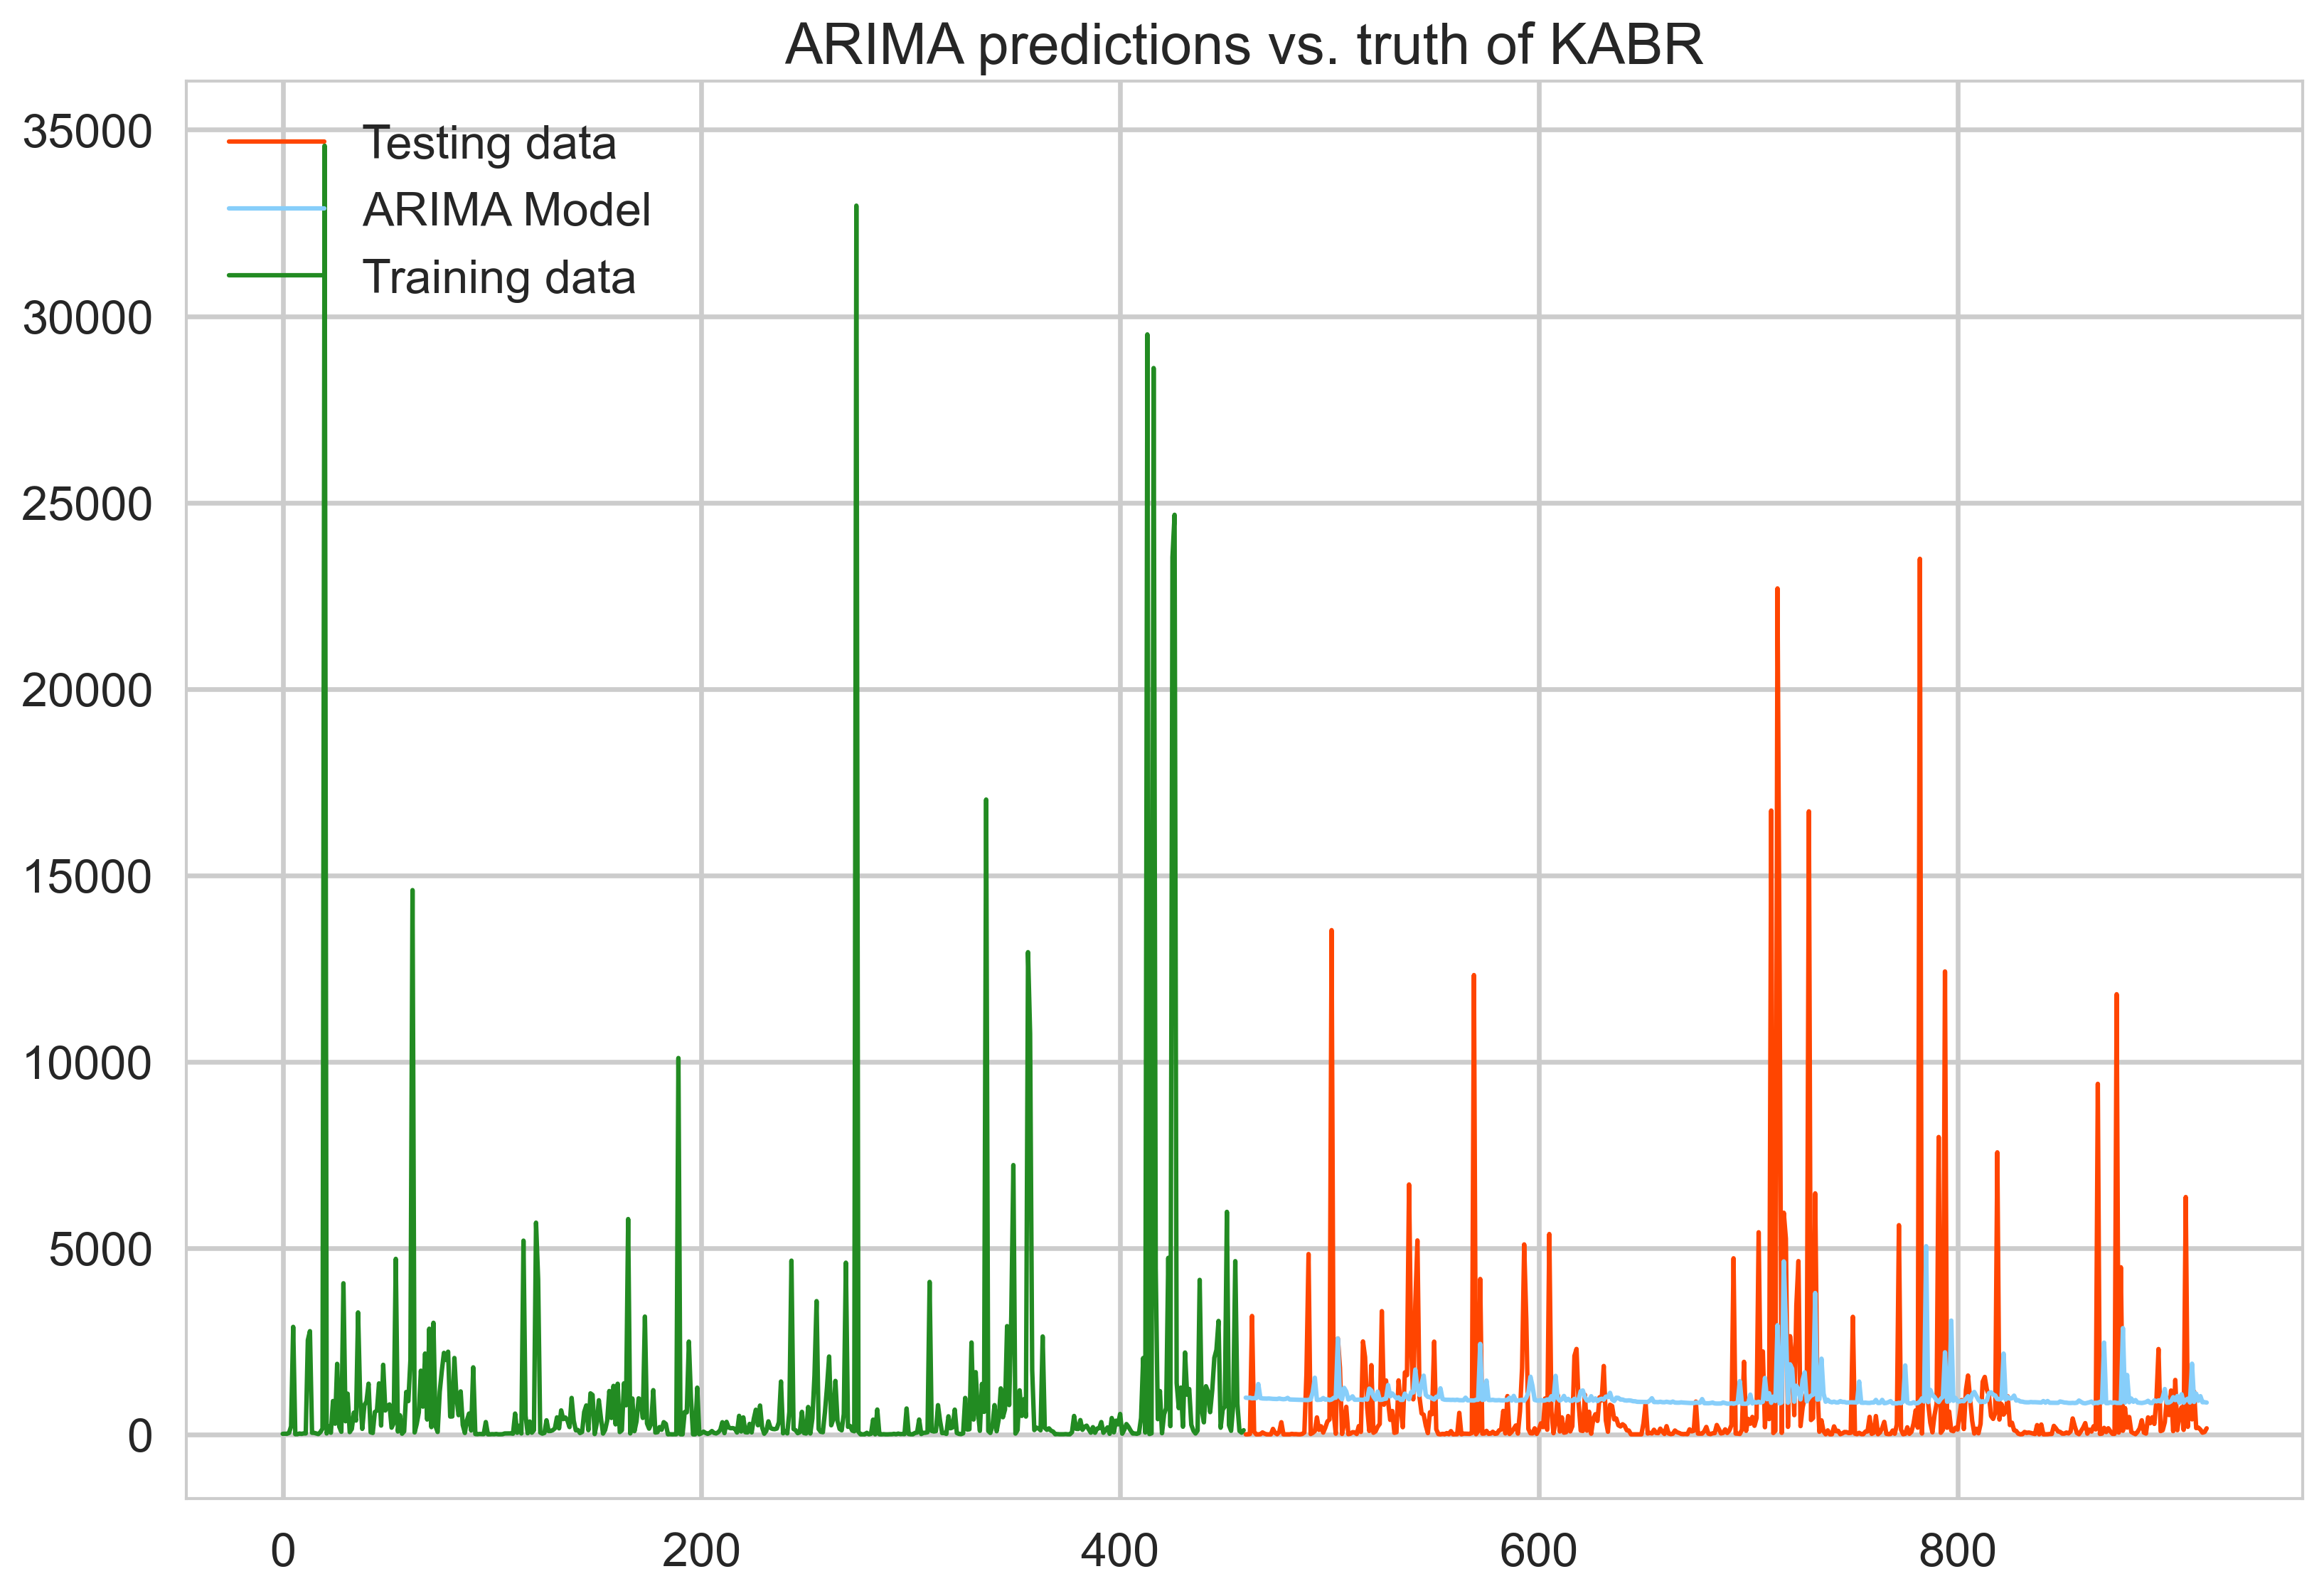

In [16]:
df_forecasting = pd.read_csv('../dataset/time_filled_AR.csv')
#df_forecasting = df_forcasting.drop(['samplingperiod'], axis = 1)
coef = 0.5
radar = 'KABR' 
pred = pd.DataFrame()
for radar in tqdm(df_forecasting.columns.drop('samplingperiod')):
    data = df_forecasting[radar]
    times = adf_test(data)
    pred[[radar]] = ARIMA_model_loop(data, coef, times, radar)
    print(pred)
    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    line_plot2(ts_1 = test, ts_label_1 = 'Testing data',
               ts_2 = pred[radar], ts_label_2 = 'ARIMA Model', 
               ts_3 = train, ts_label_3 = 'Training data',
               title='ARIMA predictions vs. truth of %s'%radar, 
               m = 'ARIMA_loop_%s'%radar)

pred.to_csv('../dataset/pred_ARIMA.csv', index = False)

## ARIMA with log

0      1.162609
1      1.259296
2      1.208566
3      1.585206
4      2.336162
         ...   
915    2.265643
916    2.111049
917    1.666852
918    1.811675
919    2.213796
Name: KABR, Length: 920, dtype: float64


/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/User

         KABR
0    2.001070
1    2.076824
2    1.640209
3    1.509127
4    1.719284
..        ...
455  2.429280
456  2.257744
457  2.168256
458  2.121941
459  2.004480

[460 rows x 1 columns]
           KABR
0     99.246787
1    118.350391
2     42.672550
3     31.294407
4     51.394345
..          ...
455  267.707855
456  180.027158
457  146.318108
458  131.416046
459  100.036960

[460 rows x 1 columns]


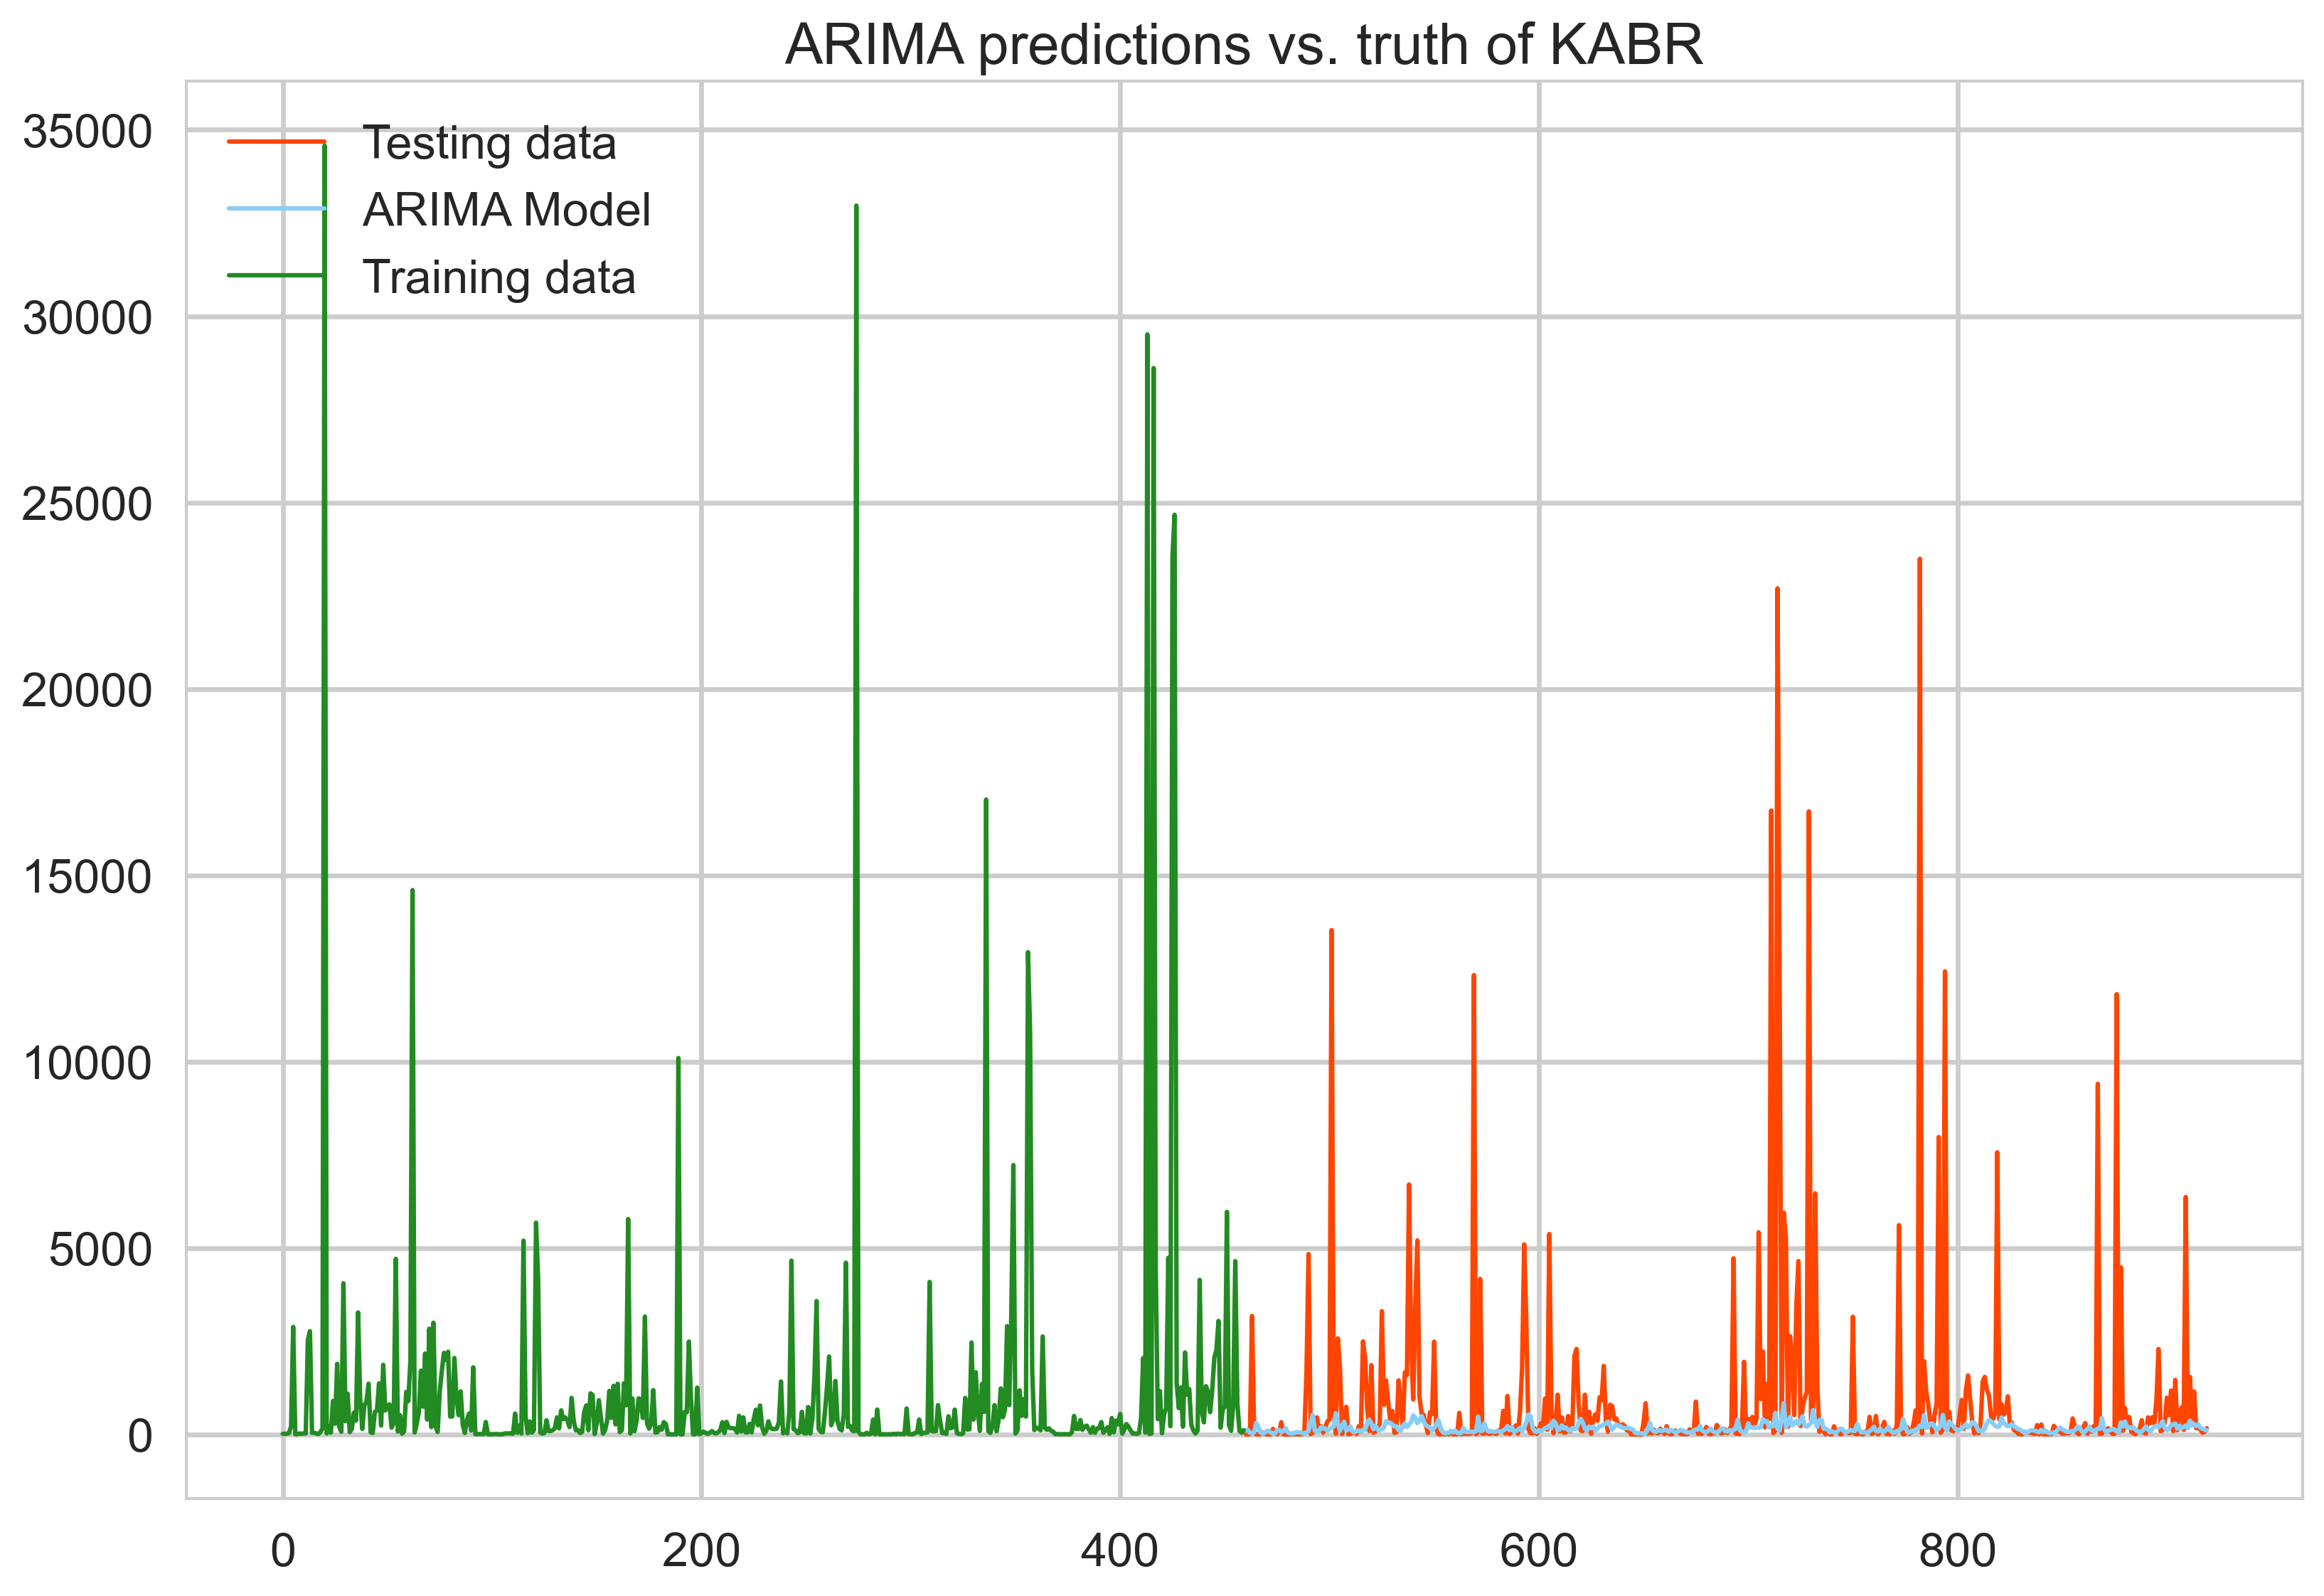

           KABR
0     99.246787
1    118.350391
2     42.672550
3     31.294407
4     51.394345
..          ...
455  267.707855
456  180.027158
457  146.318108
458  131.416046
459  100.036960

[460 rows x 1 columns]


In [5]:
df_forecasting = pd.read_csv('../dataset/time_filled_AR.csv')
#print(data.isnull().sum())
#df_forecasting = df_forcasting.drop(['samplingperiod'], axis = 1)
coef = 0.5
pred = pd.DataFrame()
radar = 'KABR' 

#print(df_forecasting[radar])
for radar in tqdm(df_forecasting.columns):
    data = df_forecasting[radar]
    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    df_forecasting = np.log10(data+1)
    print(df_forecasting)
    times = adf_test(df_forecasting)
    pred[[radar]] = np.power(10, ARIMA_model_loop(df_forecasting, coef, times, radar))-1
    print(ARIMA_model_loop(df_forecasting, coef, times, radar))
    print(pred[[radar]])
    line_plot2(ts_1 = test, ts_label_1 = 'Testing data',
              ts_2 = pred[radar], ts_label_2 = 'ARIMA Model', 
              ts_3 = train, ts_label_3 = 'Training data',
              title='ARIMA predictions vs. truth of %s'%radar, 
              m = 'ARIMA_log_%s'%radar)

    print(pred)
pred.to_csv('../dataset/pred_log.csv', index = False)


## ARIMA without loop

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/User

            KABR
460   984.990046
461   979.443720
462   987.370892
463  1092.309056
464  1091.642780
..           ...
915  1106.961376
916  1106.961376
917  1106.961376
918  1106.961376
919  1106.961376

[460 rows x 1 columns]


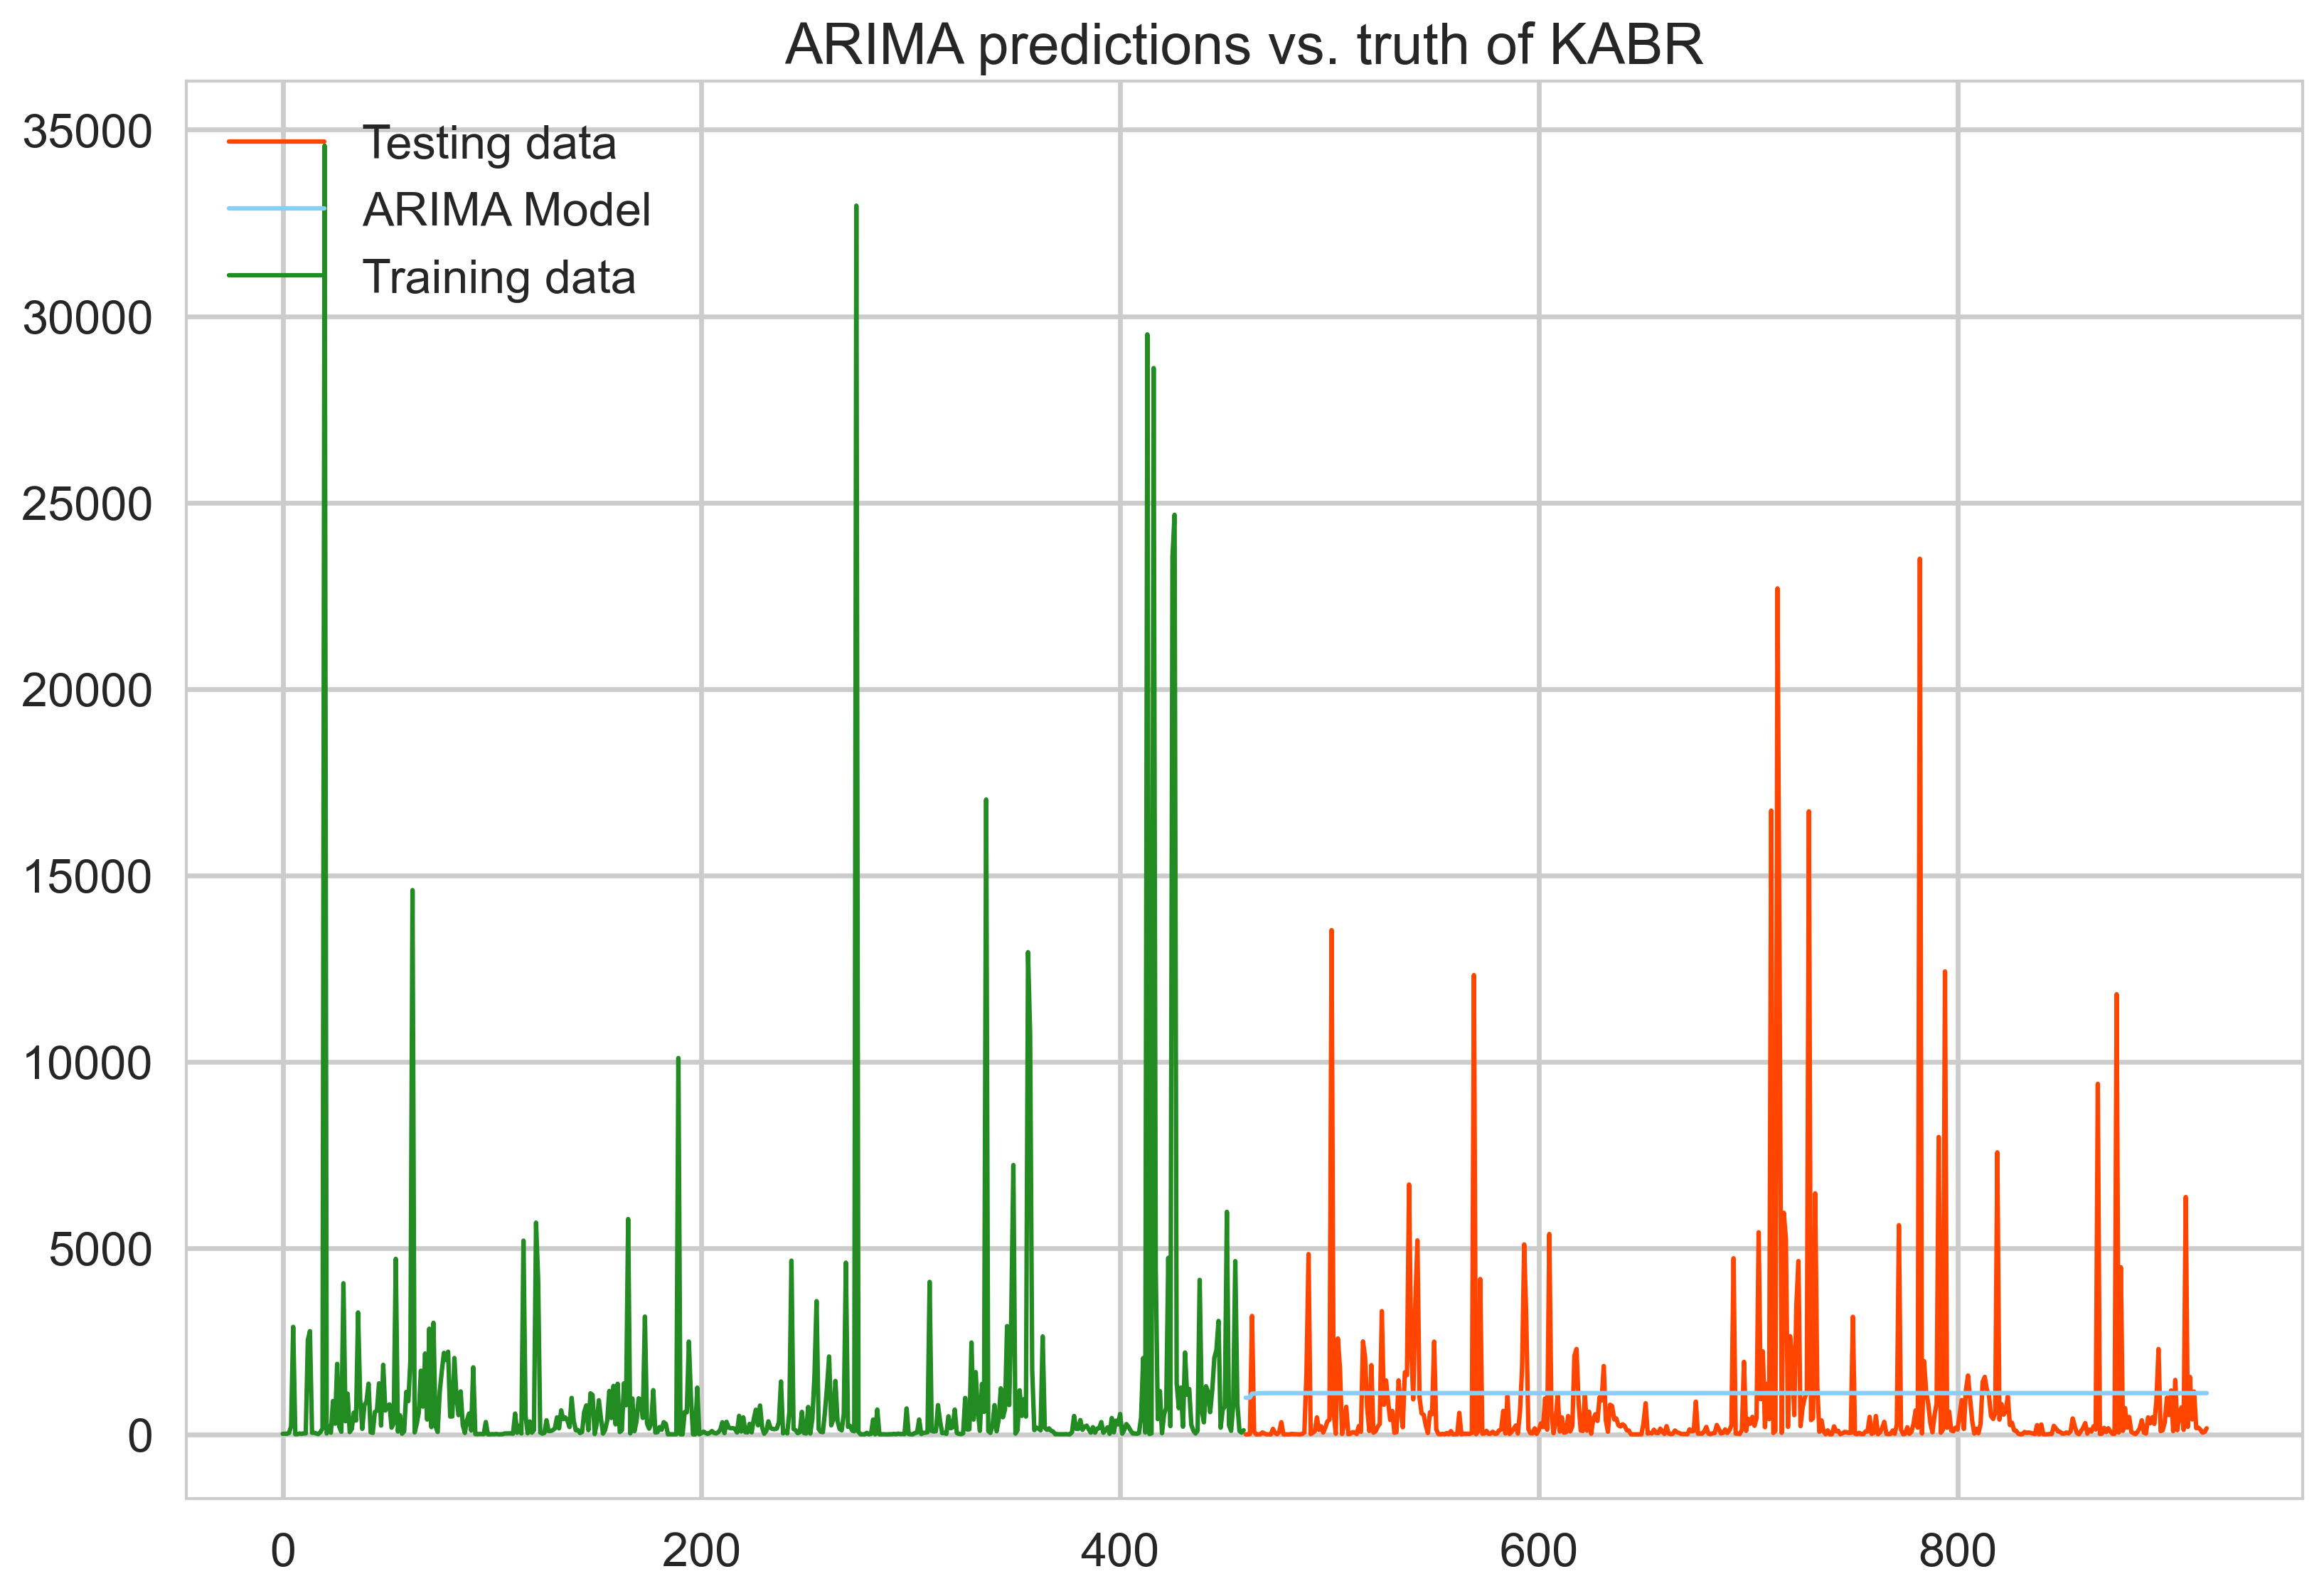

In [34]:
df_forecasting = pd.read_csv('../dataset/time_filled_AR.csv')
coef = 0.5
pred = pd.DataFrame()
radar = 'KABR'
for radar in tqdm(df_forecasting.columns.drop('samplingperiod')):
    data = df_forecasting[radar]
    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    times = adf_test(data)
    pred[[radar]] = ARIMA_model(data, coef, times, radar)
    print(pred)
    line_plot2(ts_1 = test, ts_label_1 = 'Testing data',
              ts_2 = pred[radar], ts_label_2 = 'ARIMA Model', 
              ts_3 = train, ts_label_3 = 'Training data',
              title='ARIMA predictions vs. truth of %s'%radar, 
              m = 'ARIMA_noloop_%s'%radar)


pred.to_csv('../dataset/pred_ARIMA_noloop.csv', index = False)


## Comparison between three methods

In [ ]:
comparaison_plot(ts_1 = pred[int(len(pred)*coef)-2:], ts_label_1 = 'ARIMA loop', ts_2 = time.radar[radar][int(len(pred)*coef)-2:], 
                 ts_label_2 = 'true data', ts_3 = pred1[int(len(pred)*coef)-2:], ts_label_3 = 'ARIMA', 
                 title = 'comparison of ARIMA and ARIMA loop')
comparaison_plot(ts_1 = pred, ts_label_1 = 'ARIMA loop', ts_2 = time.radar[radar], 
                 ts_label_2 = 'true data', ts_3 = pred1, ts_label_3 = 'ARIMA', 
                 title = 'comparison of ARIMA and ARIMA loop')

# Forecasting (VAR)

In [ ]:
time_radar = pd.read_csv('../dataset/time_filled_ARIMA.csv')
coef = 0.7
#apply adf test on the series
test = time_radar[int(coef*(len(time.radar))):]
train = time_radar[:int(coef*(len(time.radar)))]
predictions = train
#start_t = len(train)
#for t_i in tqdm(range(len(test))):
#current_t = t_i + start_t
model = VAR(train)#time.radar[:current_t])
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(test))
prediction = pd.DataFrame(prediction, columns = time_radar.columns)
predictions = pd.concat([predictions, prediction], axis = 0)
predictions.reset_index(drop = True, inplace = True)

In [ ]:
for radar in predictions.columns:
    plot_time_series(ts_1=predictions[radar], ts_label_1='VAR prediction', ts_2=time.radar[radar], ts_label_2='True data', title='VAR predictions vs. ground truth of %s'%radar, path = '../figures/bird/VAR/%s.png'%radar)


In [ ]:
predictions.to_csv('../dataset/pred_var.csv', index = False)

# Forecasting(ARMAX)

In [ ]:
def order_armax(train, data_ex, times):
    tmp = []
    for p in tqdm(range(1, 6)):
        for q in tqdm(range(5)):
            try:
                tmp.append([ARIMA(train, exog = data_ex, order=(p, times, q)).fit().bic, p, q])
            except:
                tmp.append([None, p, q])
    tmp = pd.DataFrame(tmp,columns = ['bic', 'p', 'q'])
    return tmp[tmp['bic'] == tmp['bic'].min()]

def ARMAX_model(data, data_ex, coef, times):

    train = data[:int(len(data)*coef)]
    test = data[int(len(data)*coef):]
    par = order_armax(train, data_ex[:int(len(data)*coef)], times)
    # Forecast
    start_t = len(train)
    predictions = list()
    for t in range(len(test)): 
        
        current_t = t + start_t
        model = ARIMA(data[:current_t], exog = data_ex[:current_t], order=(par['p'], times, par['q']))       
        model_fit = model.fit()  
        
        print(model_fit.predict())
        #print(model_fit.summary())
        model_fit.plot_diagnostics(figsize=(12, 12))

        #print(model_fit.forecast())
        predictions.append(model_fit.predict())
        
    predictions = pd.DataFrame(predictions)
    predictions = pd.concat([train, predictions], axis = 0)
    predictions.reset_index(inplace = True, drop = True)
    
    return predictions 



In [ ]:
time_radar = pd.read_csv('../dataset/radar/time_filled_ARIMA.csv')
data_w = pd.read_csv('../dataset/radar/weather_information.csv')
radars = time_radar.columns
coef = 0.5
times = 0
weather1=['uwind','vwind','air','pressure.sfc','relative.humidity','ordinal.date', 
         'omega', 'total.cloud.cover', 'visibility', 'albedo', 'acc.total.precip', 'msl.pressure','cape','snow.cover']
#for radar in radars:
radar = 'KABX'
print(len(time_radar[radar]))
print(len(data_w[data_w['radar_id'] == radar][weather1]))
pred = ARMAX_model(time_radar[radar], data_w[data_w['radar_id'] == radar][weather1], coef, times)


In [ ]:
plot_time_series(ts_1=pred, ts_label_1='ARIMA Model', ts_2=data.density[data.density['radar_id'] == radar]['linear_eta'], ts_label_2='True data', title='ARIMA predictions vs. ground truth of %s'%radar, path = '../figures/bird/%s.png'%radar)
